In [1]:
import pandas as pd

In [2]:
tracks = pd.read_json("tracks.json")

In [3]:
tracks.head()

,id,explicit,name,previewUrl,isrc,isrcYear,isrcAgency,isrcTerritory,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationMs,timeSignature
0,000RW47rhEkSqjgTrZx7YX,False,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,BRRGE2010642,2020,Pro-música Brazil,Brazil,0.752,0.620,...,-5.536,1,0.0509,0.30900,0.000000,0.0750,0.962,117.399,164459,4
1,000xQL6tZNLJzIrtIgxqSl,False,Still Got Time (feat. PARTYNEXTDOOR),https://p.scdn.co/mp3-preview/83fad967740b8a85...,USRC11700675,2017,RIAA,United States,0.748,0.627,...,-6.029,1,0.0639,0.13100,0.000000,0.0852,0.524,120.963,188491,4
2,000xYdQfIZ4pDmBGzQalKU,False,"Eu, Você, O Mar e Ela",https://p.scdn.co/mp3-preview/ae0e943883e06623...,BRRGE1603547,2016,Pro-música Brazil,Brazil,0.509,0.803,...,-6.743,1,0.0400,0.68400,0.000539,0.4630,0.651,166.018,187119,4
3,001b8t3bYPfnabpjpfG1Y4,True,Geen Stof,https://p.scdn.co/mp3-preview/535320aa4cbc5811...,NLG662000948,2020,SENA,Netherlands,0.772,0.635,...,-4.846,1,0.3720,0.10500,0.000000,0.1170,0.541,95.951,167866,4
4,003VDDA7J3Xb2ZFlNx7nIZ,True,YELL OH,https://p.scdn.co/mp3-preview/14e659590d1a70cf...,QZJ842000061,2020,RIAA,United States,0.842,0.578,...,-6.050,0,0.1380,0.00419,0.000000,0.2280,0.190,74.496,236779,4


In [4]:
tracks.dtypes

id                   object
explicit               bool
name                 object
previewUrl           object
isrc                 object
isrcYear              int64
isrcAgency           object
isrcTerritory        object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
durationMs            int64
timeSignature         int64
dtype: object

In [5]:
tracks["mode"]

0        1
1        1
2        1
3        1
4        0
        ..
33845    0
33846    1
33847    1
33848    1
33849    0
Name: mode, Length: 33850, dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='mode', ylabel='count'>

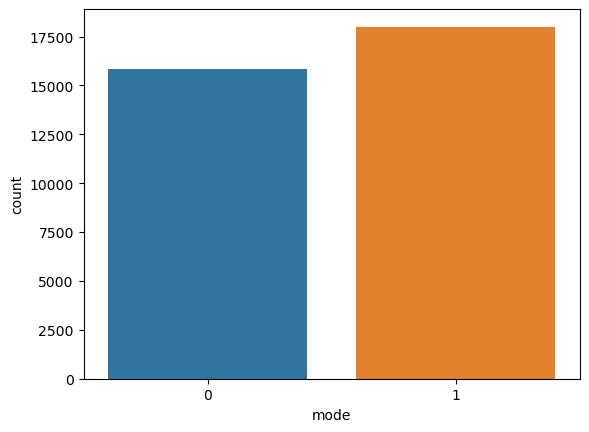

In [7]:
sns.countplot(x="mode", data=tracks)

In [8]:
tracks["mode"] = tracks["mode"].astype("category")

In [9]:
tracks["mode"] = tracks["mode"].cat.rename_categories({ 0: "Minor", 1: "Major" })

In [10]:
tracks["mode"].value_counts()

Major    18004
Minor    15846
Name: mode, dtype: int64

In [11]:
tracks.timeSignature.value_counts(normalize=True)

4    0.935894
3    0.040325
5    0.019645
1    0.004077
0    0.000059
Name: timeSignature, dtype: float64

In [12]:
def rename_least_frequent_to_other(series, share_of_total=0.01):
    """Rename least frequent values to 'Other'."""
    counts = series.value_counts()
    least_frequent = counts[counts < share_of_total * counts.sum()]
    return series.replace(least_frequent.index, "Other")

In [13]:
rename_least_frequent_to_other(tracks.timeSignature).value_counts(normalize=True)

4        0.935894
3        0.040325
5        0.019645
Other    0.004136
Name: timeSignature, dtype: float64

In [14]:
tracks["timeSignature"] = rename_least_frequent_to_other(tracks.timeSignature)

In [15]:
tracks["timeSignature"] = tracks["timeSignature"].astype("category")

In [16]:
tracks["timeSignature"] = tracks["timeSignature"].cat.rename_categories({ 3: "3/4", 4: "4/4", 5: "5/4" })

In [17]:
tracks["timeSignature"].value_counts()

4/4      31680
3/4       1365
5/4        665
Other      140
Name: timeSignature, dtype: int64

In [22]:
tracks["explicit"] = tracks["explicit"].astype("category")
tracks["explicit"] = tracks["explicit"].cat.rename_categories({ 0: "No", 1: "Yes" })

In [25]:
tracks["key"] = tracks["key"].astype("category")
tracks["key"] = tracks["key"].cat.rename_categories({ 0: "C", 1: "C#/Db", 2: "D", 3: "D#/Eb", 4: "E", 5: "F", 6: "F#/Gb", 7: "G", 8: "G#/Ab", 9: "A", 10: "A#/Bb", 11: "B" })

In [26]:
tracks.head()

,id,explicit,name,previewUrl,isrc,isrcYear,isrcAgency,isrcTerritory,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,durationMs,timeSignature
0,000RW47rhEkSqjgTrZx7YX,No,Lance Individual,https://p.scdn.co/mp3-preview/c64292f4c53560bc...,BRRGE2010642,2020,Pro-música Brazil,Brazil,0.752,0.620,...,-5.536,Major,0.0509,0.30900,0.000000,0.0750,0.962,117.399,164459,4/4
1,000xQL6tZNLJzIrtIgxqSl,No,Still Got Time (feat. PARTYNEXTDOOR),https://p.scdn.co/mp3-preview/83fad967740b8a85...,USRC11700675,2017,RIAA,United States,0.748,0.627,...,-6.029,Major,0.0639,0.13100,0.000000,0.0852,0.524,120.963,188491,4/4
2,000xYdQfIZ4pDmBGzQalKU,No,"Eu, Você, O Mar e Ela",https://p.scdn.co/mp3-preview/ae0e943883e06623...,BRRGE1603547,2016,Pro-música Brazil,Brazil,0.509,0.803,...,-6.743,Major,0.0400,0.68400,0.000539,0.4630,0.651,166.018,187119,4/4
3,001b8t3bYPfnabpjpfG1Y4,Yes,Geen Stof,https://p.scdn.co/mp3-preview/535320aa4cbc5811...,NLG662000948,2020,SENA,Netherlands,0.772,0.635,...,-4.846,Major,0.3720,0.10500,0.000000,0.1170,0.541,95.951,167866,4/4
4,003VDDA7J3Xb2ZFlNx7nIZ,Yes,YELL OH,https://p.scdn.co/mp3-preview/14e659590d1a70cf...,QZJ842000061,2020,RIAA,United States,0.842,0.578,...,-6.050,Minor,0.1380,0.00419,0.000000,0.2280,0.190,74.496,236779,4/4


In [27]:
tracks.dtypes

id                    object
explicit            category
name                  object
previewUrl            object
isrc                  object
isrcYear               int64
isrcAgency            object
isrcTerritory         object
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
durationMs             int64
timeSignature       category
dtype: object